# Bootstrapping the Coin Toss

In this notebook, you will simulate a fair coin toss using a Bernoulli distribution and then use <a href="https://en.wikipedia.org/wiki/Bootstrapping_(statistics)">bootstrapping</a> to quantify the fairness of the coin and its uncertainty.

## Imports

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

## Bootstrapping the fair coin toss

In [2]:
n = 500

Use `numpy.random.choice` to simulate `n` tosses of a fair coin that has values of `H` and `T` with equal probabilities. Save the data in a NumPy array named `data`.

In [3]:
def fairGame(flips):
    return np.random.choice(['H','T'], flips)
data = fairGame(20)

Make an appropriately labeled `countplot` using Seaborn to visualize the coin tosses:

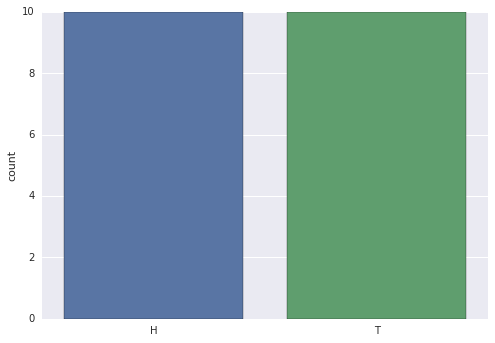

In [4]:
sns.countplot(data)

Write a function, `fair`, that computes the ratio of the number of `H` values to the total number of values.

In [5]:
def fair(data):
    h = 0

    if 'H' not in data:
        return 0.0
    
    for ele in data:
        if ele == 'H':
            h += 1

    return h/len(data)
        

In [6]:
assert fair(np.array(['H','H','T','T']))==0.5
assert fair(np.array(['T','T','T','T']))==0.0
assert fair(np.array(['H','H','H','T']))==0.75
assert fair(np.array(['H','H','H','H']))==1.0

Write a function, `bootstrap_data` that can bootstrap resample a 1d NumPy array a single time. The return value should be an array with the same shape as the input, with random samples drawn from the input array with replacement.

In [7]:
def bootstrap_data(data):
    boots = np.random.choice(data,len(data))
    return boots

In [8]:
test_data = np.random.randint(10, size=10)
test_data_re = bootstrap_data(test_data)
assert test_data.shape==test_data_re.shape
for element in test_data_re:
    assert element in test_data

Write a function, `bootstrap_function`, that can apply a function to `n` bootstrapped versions of an input array:

In [21]:
def bootstrap_function(data, f, n):
    arr = []
    for i in range(n):
        arr.append(f(data))
    return np.array(arr)


In [22]:
test_data = np.array([0,0,0,0,1,1,1,1])
fb = bootstrap_function(test_data, lambda data: 1.0, 10)
assert np.allclose(fb, np.array(10*[1.0]))
fb = bootstrap_function(test_data, lambda data: data.mean(), 10)
assert fb.mean()<1.0 and fb.mean()>0.0

Now use `bootstrap_function` to apply the `fair` function to `200` bootstrapped versions of the original data above to compute the bootstrapped distribution of coin fairness.

In [25]:
dis_coins = bootstrap_function(data,bootstrap_data, 200)
dis_coins

array([['T', 'T', 'T', ..., 'T', 'H', 'H'],
       ['T', 'H', 'T', ..., 'H', 'T', 'H'],
       ['T', 'T', 'H', ..., 'H', 'T', 'H'],
       ..., 
       ['T', 'T', 'T', ..., 'H', 'T', 'H'],
       ['T', 'H', 'H', ..., 'T', 'T', 'H'],
       ['T', 'H', 'T', ..., 'T', 'T', 'H']], 
      dtype='<U1')

Visualize the bootstrapped fairness distribution using an appropriately labeled Seaborn `distplot`. Make sure your x-limit spans $[0,1]$. The distribution should be peaked near 0.5 (fair coin), but have a finite variance indicating the uncertainty in the fairness.

In [ ]:
def plot_normal(mu, sigma):
    X = np.random.normal(mu, sigma, size=300)
    sns.distplot(X, bins=20, rug=True);
    print("mean =", X.mean(), "var =", X.var())
    plt.xlim(-15.0, 15.0)
    plt.xlabel('X')
    
interact(plot_normal, mu=(-5.0,5.0), sigma=(1.0, 5.0), __manual=True);

Compute the mean and 95% confidence interval for the fairness using `np.percentile`:

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()